# Аттестационная работа №3

Данные: https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification

Данные об астероидах - *NeoWs*.

*NeoWs (Near Earth Object Web Service)* - это RESTful веб-сервис для информации об астероидах, находящихся около Земли. С NeoWs пользователь может: искать астероиды по дате их наибольшего сближения с Землей, искать конкретный астероид по его идентификатору NASA JPL small body, а также просматривать весь набор данных.

*Задача:*

1. Поиск потенциально опасных и неопасных астероидов
2. Особенности, позволяющие отнести астероид к опасным

*Данные датасета:*

- `Neo Reference ID` - Идентификатор Neo
- `Name` - Имя 
- `Absolute Magnitude` - Абсолютная звездная величина
- `Est Dia in KM(min)` - Расчетный диаметр в километрах (минимум)
- `Est Dia in KM(max)` - Расчетный диаметр в километрах (максимум)
- `Est Dia in M(min)` - Расчетный диаметр в метрах (минимум)
- `Est Dia in M(max)` - Расчетный диаметр в метрах (максимум)
- `Est Dia in Miles(min)` - Расчетный диаметр в милях (минимум)
- `Est Dia in Miles(max)` - Расчетный диаметр в милях (максимум)
- `Est Dia in Feet(min)` - Расчетный диаметр в футах (минимум)
- `Est Dia in Feet(max)` - Расчетный диаметр в футах (максимум)
- `Close Approach Date` - Дата сближения с Землей
- `Epoch Date Close Approach` - Эпоха даты сближения с Землей
- `Relative Velocity km per sec` - Относительная скорость км в сек
- `Relative Velocity km per hr` - Относительная скорость км в час
- `Miles per hour` - Мили в час
- `Miss Dist.(Astronomical)` - Пропущенное расстояние (Астрономическое)
- `Miss Dist.(lunar)` - Пропущенное расстояние (лунное)
- `Miss Dist.(kilometers)` - Пропущенное расстояние (в километрах)
- `Miss Dist.(miles)` - Пропущенное расстояние (в милях)
- `Orbiting Body` - Орбитальное тело
- `Orbit ID` - ID Идентификатор орбиты
- `Orbit Determination Date` -  Дата определения орбиты
- `Orbit Uncertainity` -  Неопределенность орбиты
- `Minimum Orbit Intersection` - Минимальное пересечение орбиты
- `Jupiter Tisserand Invariant` - Инвариант Тиссерана Юпитера
- `Epoch Osculation` - Смещение эпох
- `Eccentricity` - Эксцентриситет
- `Semi Major Axis` - Большая полуось
- `Inclination`  - Наклон 
- `Asc Node Longitude` - Долгота восходящего узла
- `Orbital Period` - Орбитальный период
- `Perihelion Distance` - Расстояние до перигелия
- `Perihelion Arg` - Аргумент перигелия
- `Aphelion Dist` - Расстояние до афелия
- `Perihelion Time` - Время прохождения перигелия
- `Mean Anomaly` - Средняя аномалия
- `Mean Motion` - Среднее движение
- `Equinox` - Равноденствие. J2000 - это стандартная эпоха. Равноденствие весеннее - от него отсчитывается долгота восходящего узла.

- `Hazardous` - Опасность столкновения с Землей (целевая переменная)

## Импортируем данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            confusion_matrix, precision_score, recall_score, \
                            roc_curve, f1_score, ConfusionMatrixDisplay
                            
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# AutoML инструменты
import h2o
from h2o.automl import H2OAutoML
from autogluon.tabular import TabularPredictor
import lightautoml
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from flaml import AutoML

import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
df = pd.read_csv('nasa.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [3]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## Проведем первичный анализ данных (EDA)

In [4]:
# Функция для числовых столбцов
def eda_num_info(df):
    x = pd.DataFrame(
        {
            "Доля пропусков": df.isnull().mean(),
            "Минимальное значение": df.min(),
            "Максимальное значение": df.max(),
            "Среднее значение": df.mean(),
            "Медиана": df.median(),
            "Дисперсия": df.var(),
            "Квантиль 0.1": df.quantile(0.1),
            "Квантиль 0.9": df.quantile(0.9),
            "Квартиль 1": df.quantile(0.25),
            "Квартиль 3": df.quantile(0.75)
        }
    )
    
    return x

In [5]:
# Функция для категориальных столбцов
def eda_cat_info(df):
    x = pd.DataFrame(
        {
            "Доля пропусков": df.isnull().mean(),
            "Количество уникальных значений": df.nunique(),
            "Мода": df.mode().iloc[0]
        }
    )
    
    return x

In [6]:
col_num = df.select_dtypes(include=["number"]).columns
eda_num_info(df[col_num])

,Доля пропусков,Минимальное значение,Максимальное значение,Среднее значение,Медиана,Дисперсия,Квантиль 0.1,Квантиль 0.9,Квартиль 1,Квартиль 3
Neo Reference ID,0.0,2.000433e+06,3.781897e+06,3.272298e+06,3.514799e+06,3.009631e+11,2.303089e+06,3.748474e+06,3.097594e+06,3.690060e+06
Name,0.0,2.000433e+06,3.781897e+06,3.272298e+06,3.514799e+06,3.009631e+11,2.303089e+06,3.748474e+06,3.097594e+06,3.690060e+06
Absolute Magnitude,0.0,1.116000e+01,3.210000e+01,2.226786e+01,2.190000e+01,8.357719e+00,1.880000e+01,2.630000e+01,2.010000e+01,2.450000e+01
Est Dia in KM(min),0.0,1.010543e-03,1.557955e+01,2.046042e-01,1.108039e-01,1.365845e-01,1.460680e-02,4.619075e-01,3.346224e-02,2.538370e-01
Est Dia in KM(max),0.0,2.259644e-03,3.483694e+01,4.575089e-01,2.477650e-01,6.829225e-01,3.266179e-02,1.032856e+00,7.482384e-02,5.675969e-01
Est Dia in M(min),0.0,1.010543e+00,1.557955e+04,2.046042e+02,1.108039e+02,1.365845e+05,1.460680e+01,4.619075e+02,3.346224e+01,2.538370e+02
Est Dia in M(max),0.0,2.259644e+00,3.483694e+04,4.575089e+02,2.477650e+02,6.829225e+05,3.266179e+01,1.032856e+03,7.482384e+01,5.675969e+02
Est Dia in Miles(min),0.0,6.279224e-04,9.680682e+00,1.271351e-01,6.885032e-02,5.273554e-02,9.076240e-03,2.870159e-01,2.079246e-02,1.577270e-01
Est Dia in Miles(max),0.0,1.404077e-03,2.164666e+01,2.842828e-01,1.539540e-01,2.636777e-01,2.029509e-02,6.417871e-01,4.649336e-02,3.526882e-01
Est Dia in Feet(min),0.0,3.315431e+00,5.111402e+04,6.712737e+02,3.635298e+02,1.470183e+06,4.792256e+01,1.515444e+03,1.097842e+02,8.327987e+02


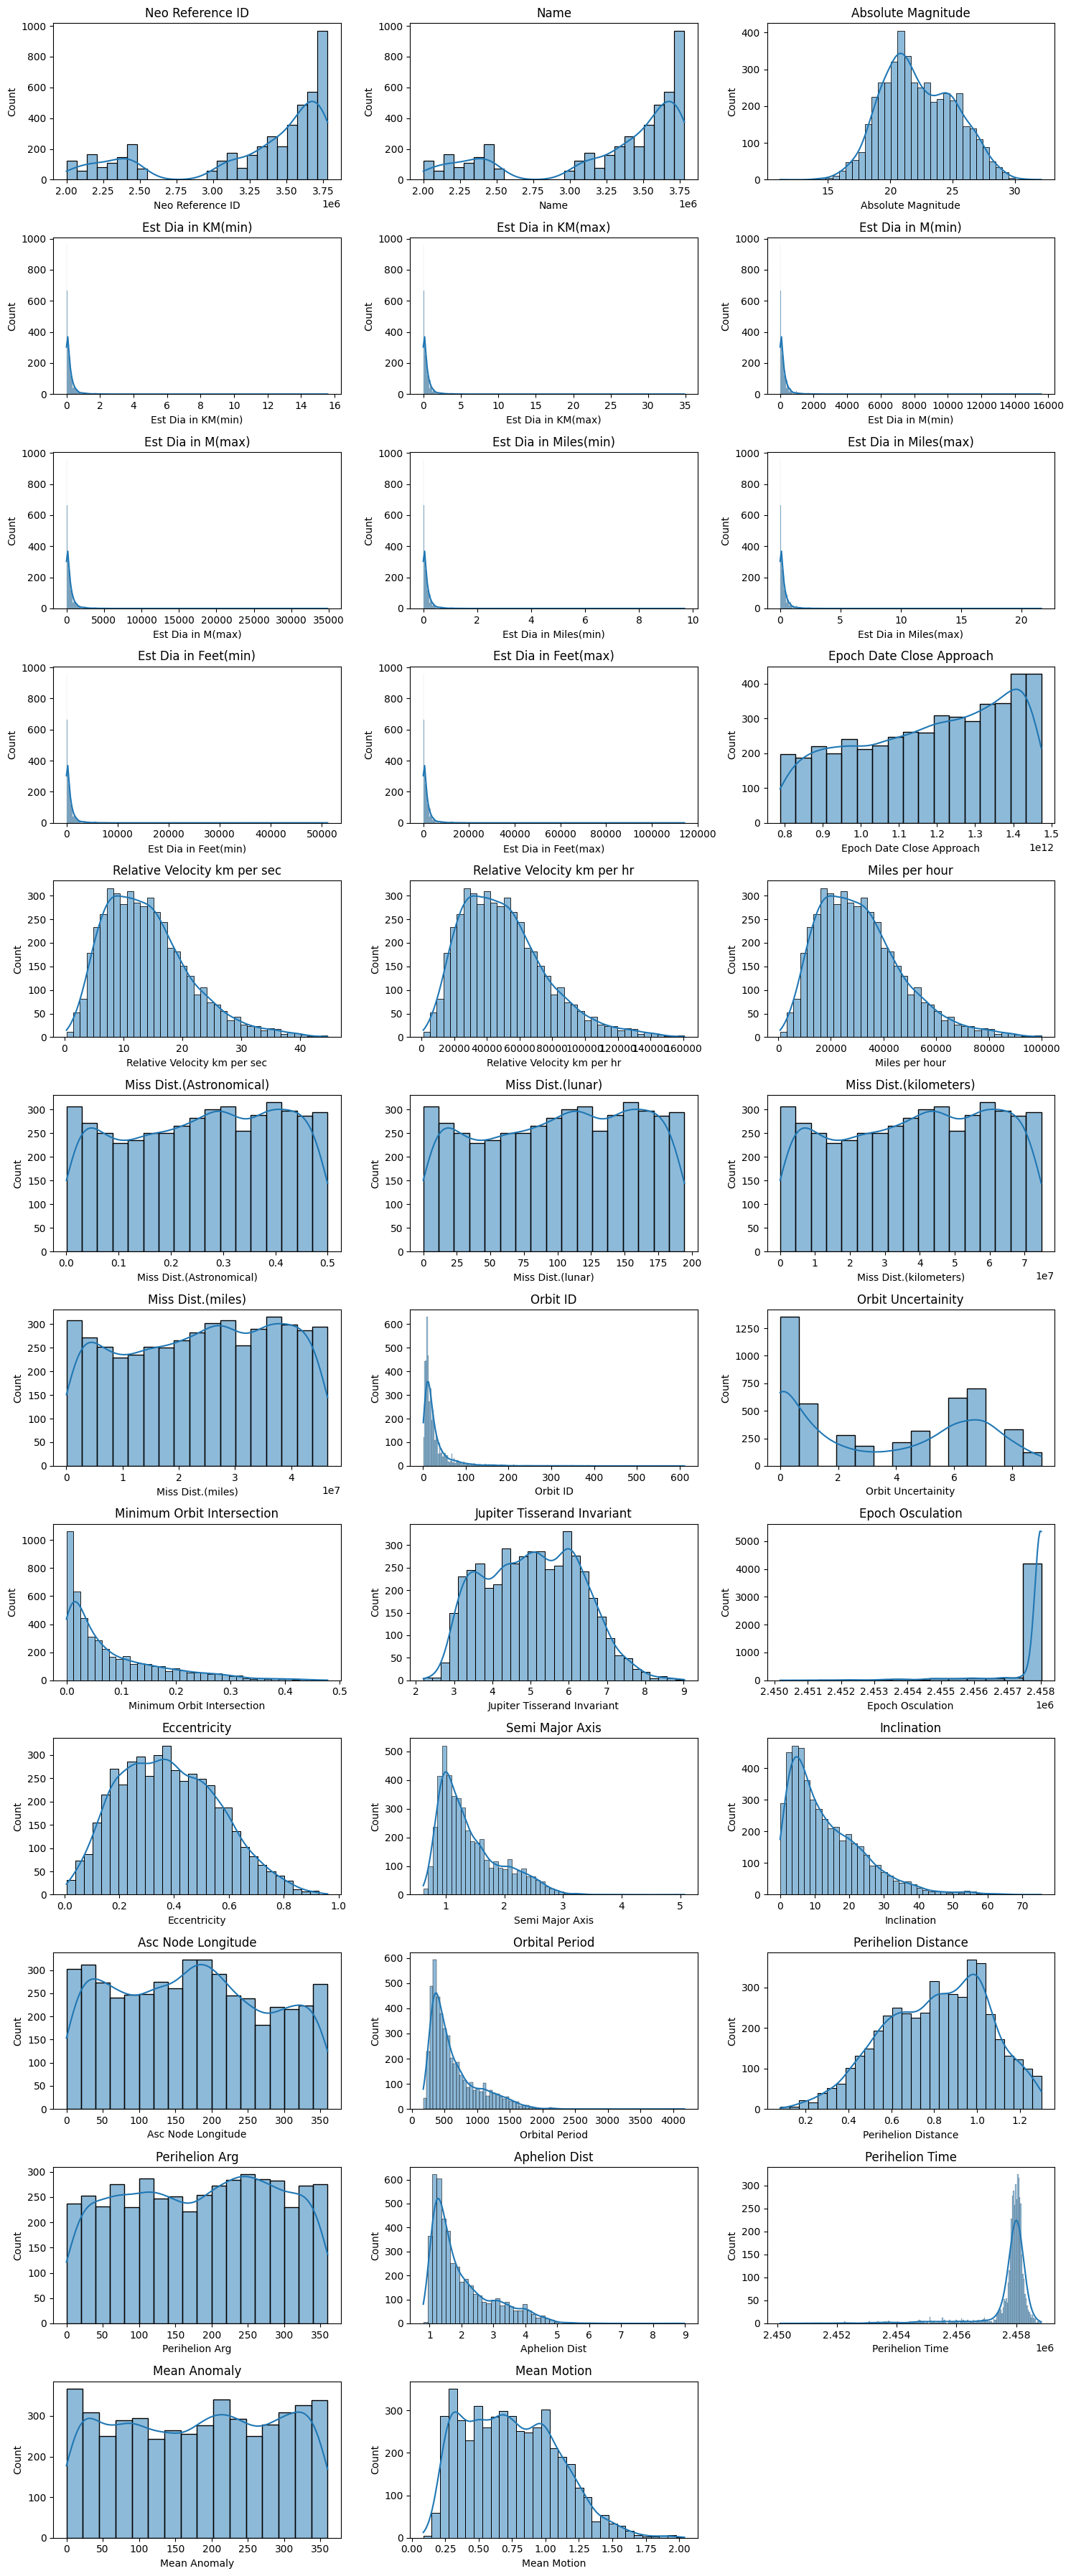

In [7]:
# Визуализация гистограмм
def plot_histograms(df):
    # Определить количество строк и столбцов для подграфиков
    n_cols = 3
    n_rows = (len(df.columns) + n_cols - 1) // n_cols
    
    # Создать фигуру с нужным размером
    plt.figure(figsize=(n_cols * 5, n_rows * 3))
    
    for i, column in enumerate(df.columns, start=1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[column], kde=True)
        
        # Добавить название столбца как заголовок графика
        plt.title(column)
        
    plt.tight_layout()
    plt.show()

# Применение функции к DataFrame df
plot_histograms(df[col_num])

In [8]:
col_cat = df.select_dtypes(include=["object"]).columns
eda_cat_info(df[col_cat])

,Доля пропусков,Количество уникальных значений,Мода
Close Approach Date,0.0,777,2016-07-22
Orbiting Body,0.0,1,Earth
Orbit Determination Date,0.0,2680,2017-06-21 06:17:20
Equinox,0.0,1,J2000


**Выводы по первичному анализу данных:**

1. В датасете 4687 строк и 40 столбцов.
2. Пропусков в данных нет.
3. Возможно присутствуют дублирующиеся столбцы, либо столбцы с высокой корреляцией.
4. Возможно имеются выбросы в данных.
5. В категориальных столбцах есть столбцы с единственным уникальным значением.

## Рассмотрим целевой признак `Hazardous`

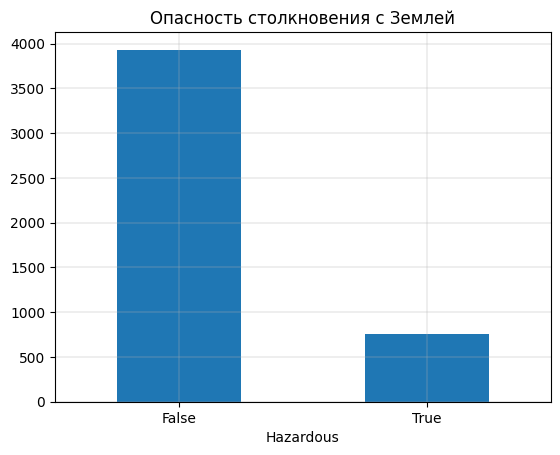

In [9]:
df['Hazardous'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.grid(linewidth=0.3)
plt.title('Опасность столкновения с Землей')
plt.show()

In [10]:
df['Hazardous'].value_counts(normalize=True)

Hazardous
False    0.838916
True     0.161084
Name: proportion, dtype: float64

In [11]:
df['Hazardous'].value_counts()

Hazardous
False    3932
True      755
Name: count, dtype: int64

Данные не сбалансированы, учтем это в дальнейшем при построении обучающей модели. Потенциально опасных астероидов - 16%.

## Подготовка данных

### Удалим столбцы с единственным значением, с датами и  ID

In [12]:
df.drop(columns=[
    'Close Approach Date',
    'Orbit Determination Date', 
    'Equinox',
    'Orbiting Body',
    'Neo Reference ID', 
    'Name', 
    'Orbit ID'
], inplace = True)

In [13]:
len(df.columns)

33

### Заменим bool значения

In [14]:
# Заменим bool значения столбца на 0 и 1
df['Hazardous'] = df['Hazardous'].replace({'True': 1, 'False': 0})
df['Hazardous'] = df['Hazardous'].astype(int)

In [15]:
df['Hazardous'].head()

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int32

### Построим матрицу корреляций

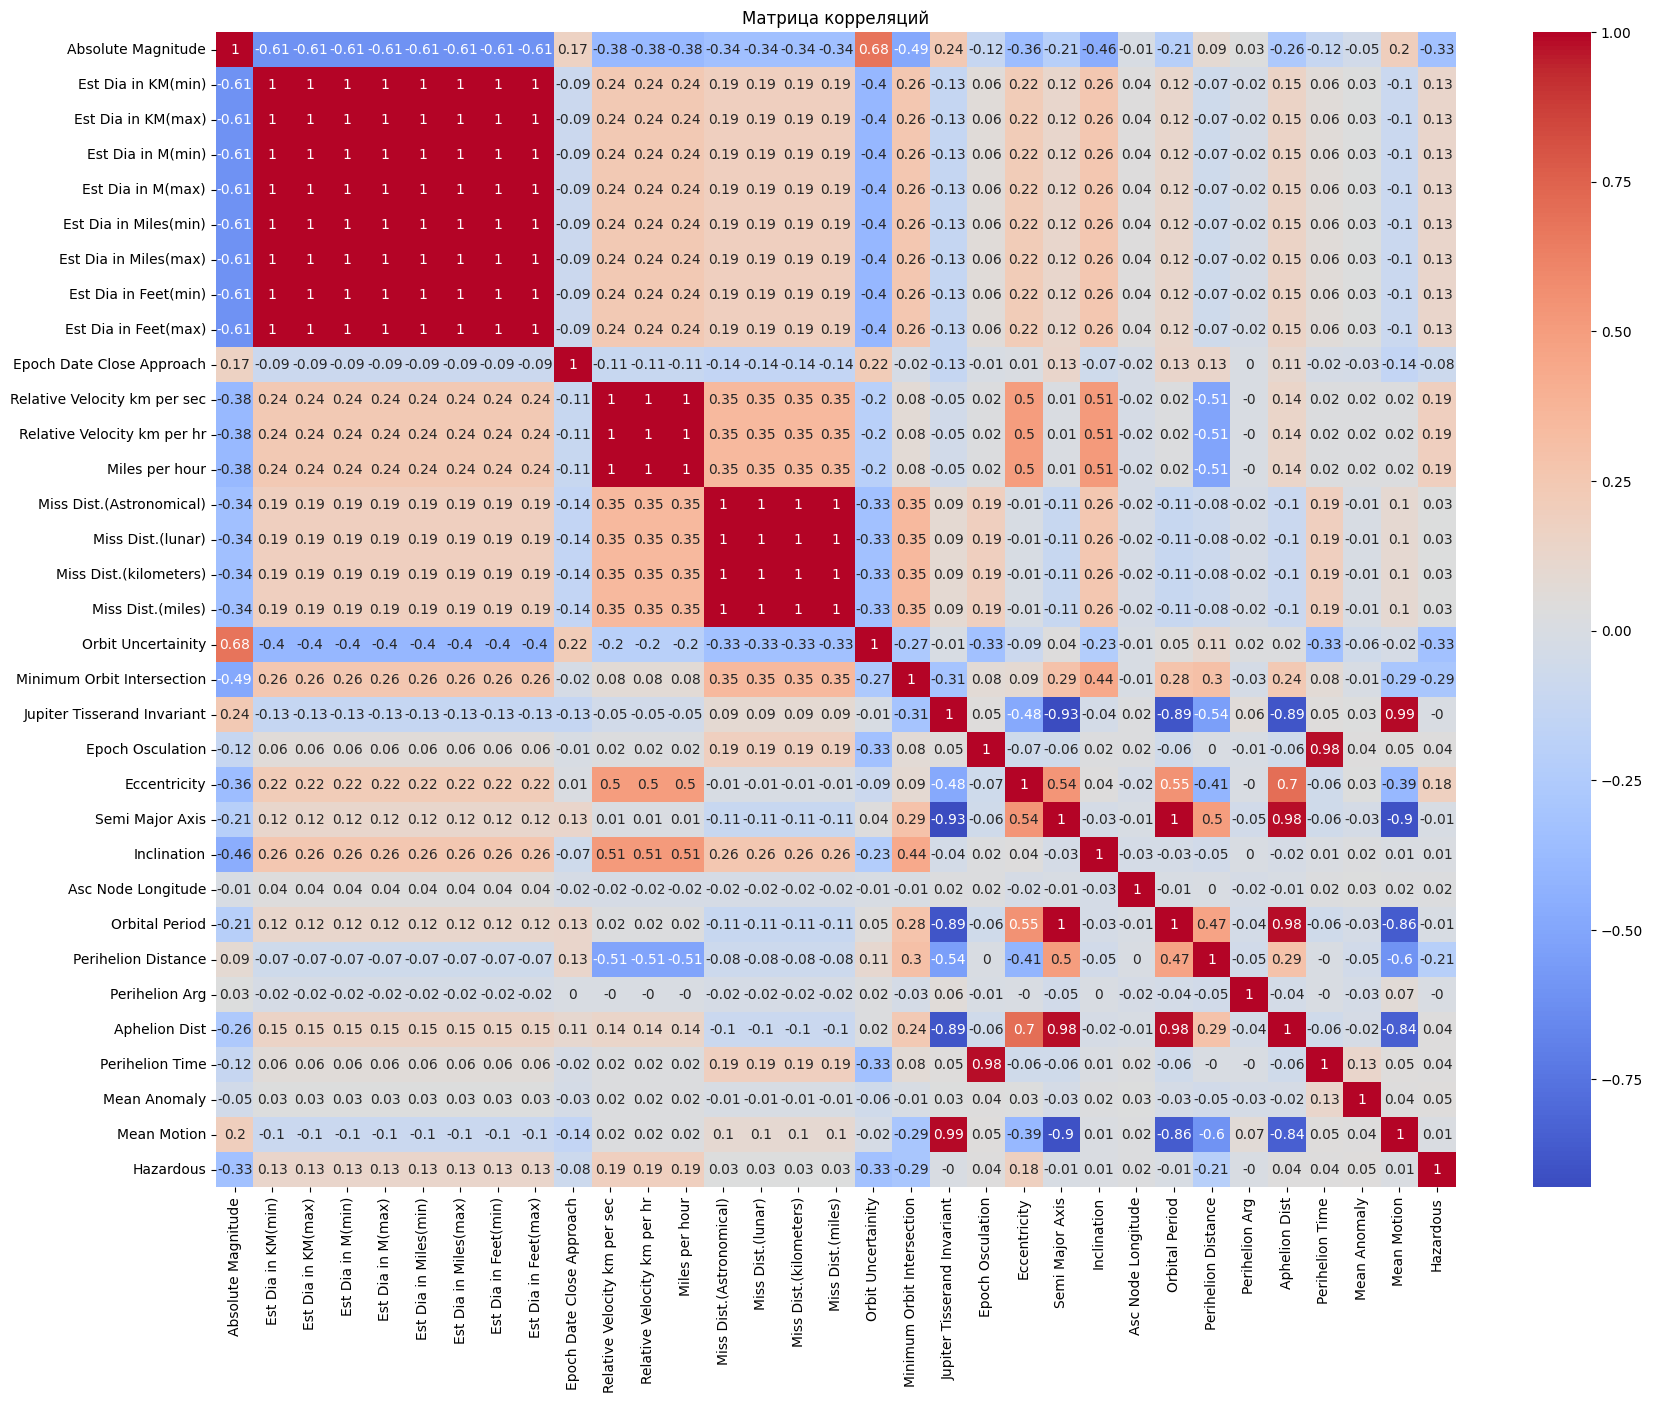

In [16]:
corr = round(df.corr(), 2)
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()

Видим, что очень многие столбцы коррелируют друг с другом и может вызвать мультиколлинеарность. Мультиколлинеарность — корреляция независимых переменных, которая затрудняет оценку и анализ общего результата.

В машинном обучении мультиколлинеарность может стать причиной переобучаемости модели, что приведет к неверному результату. Кроме того, избыточные коэффициенты увеличивают сложность модели машинного обучения, а значит, время ее тренировки возрастает.

Удалим столбцы, которые коррелируют между собой на 0.95 и выше и таким образом избавимся от мультиколлинеарности при обучении моделей.

In [17]:
df = df.drop(['Est Dia in KM(max)', 
              'Est Dia in M(min)', 
              'Est Dia in M(max)', 
              'Est Dia in Miles(min)',
              'Est Dia in Miles(max)', 
              'Est Dia in Feet(min)', 
              'Est Dia in Feet(max)', 
              'Relative Velocity km per hr', 
              'Miles per hour', 
              'Miss Dist.(lunar)', 
              'Miss Dist.(kilometers)', 
              'Miss Dist.(miles)',
              'Mean Motion',
              'Perihelion Time',
              'Aphelion Dist',
              'Orbital Period'
              ], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Mean Anomaly,Hazardous
0,21.6,0.127220,788947200000,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,0.808259,57.257470,264.837533,1
1,21.3,0.146068,788947200000,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,0.718200,313.091975,173.741112,0
2,20.3,0.231502,789552000000,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,0.950791,248.415038,292.893654,1
3,27.4,0.008801,790156800000,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,0.983902,18.707701,68.741007,0
4,21.6,0.127220,790156800000,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,0.967687,158.263596,135.142133,1


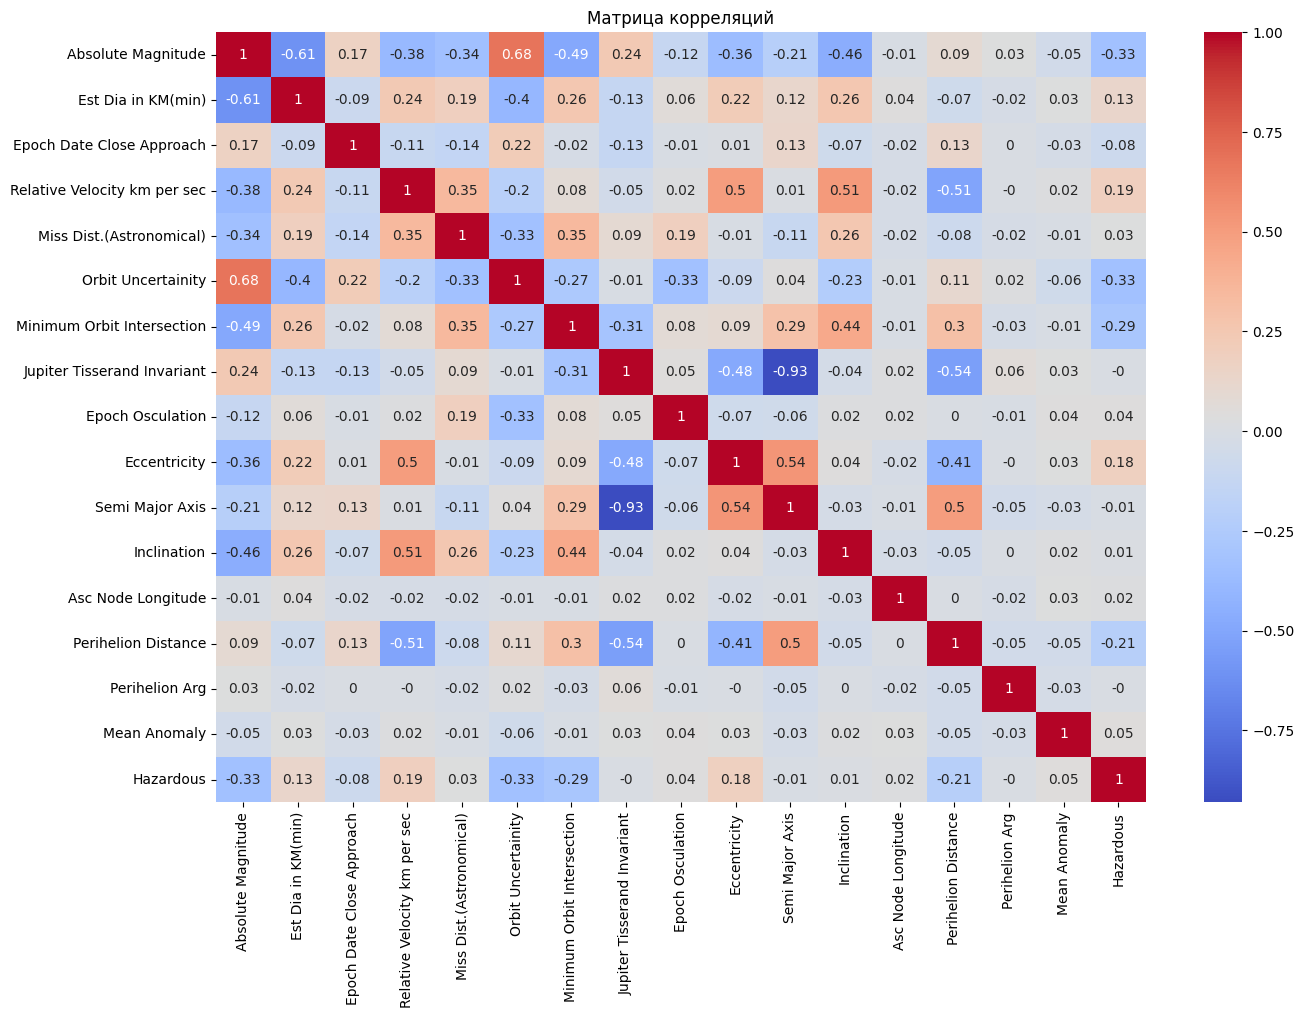

In [18]:
corr = round(df.corr(), 2)
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Epoch Date Close Approach     4687 non-null   int64  
 3   Relative Velocity km per sec  4687 non-null   float64
 4   Miss Dist.(Astronomical)      4687 non-null   float64
 5   Orbit Uncertainity            4687 non-null   int64  
 6   Minimum Orbit Intersection    4687 non-null   float64
 7   Jupiter Tisserand Invariant   4687 non-null   float64
 8   Epoch Osculation              4687 non-null   float64
 9   Eccentricity                  4687 non-null   float64
 10  Semi Major Axis               4687 non-null   float64
 11  Inclination                   4687 non-null   float64
 12  Asc Node Longitude            4687 non-null   float64
 13  Per

### Проверка дубликатов

In [20]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


### Проверка на выбросы в данных

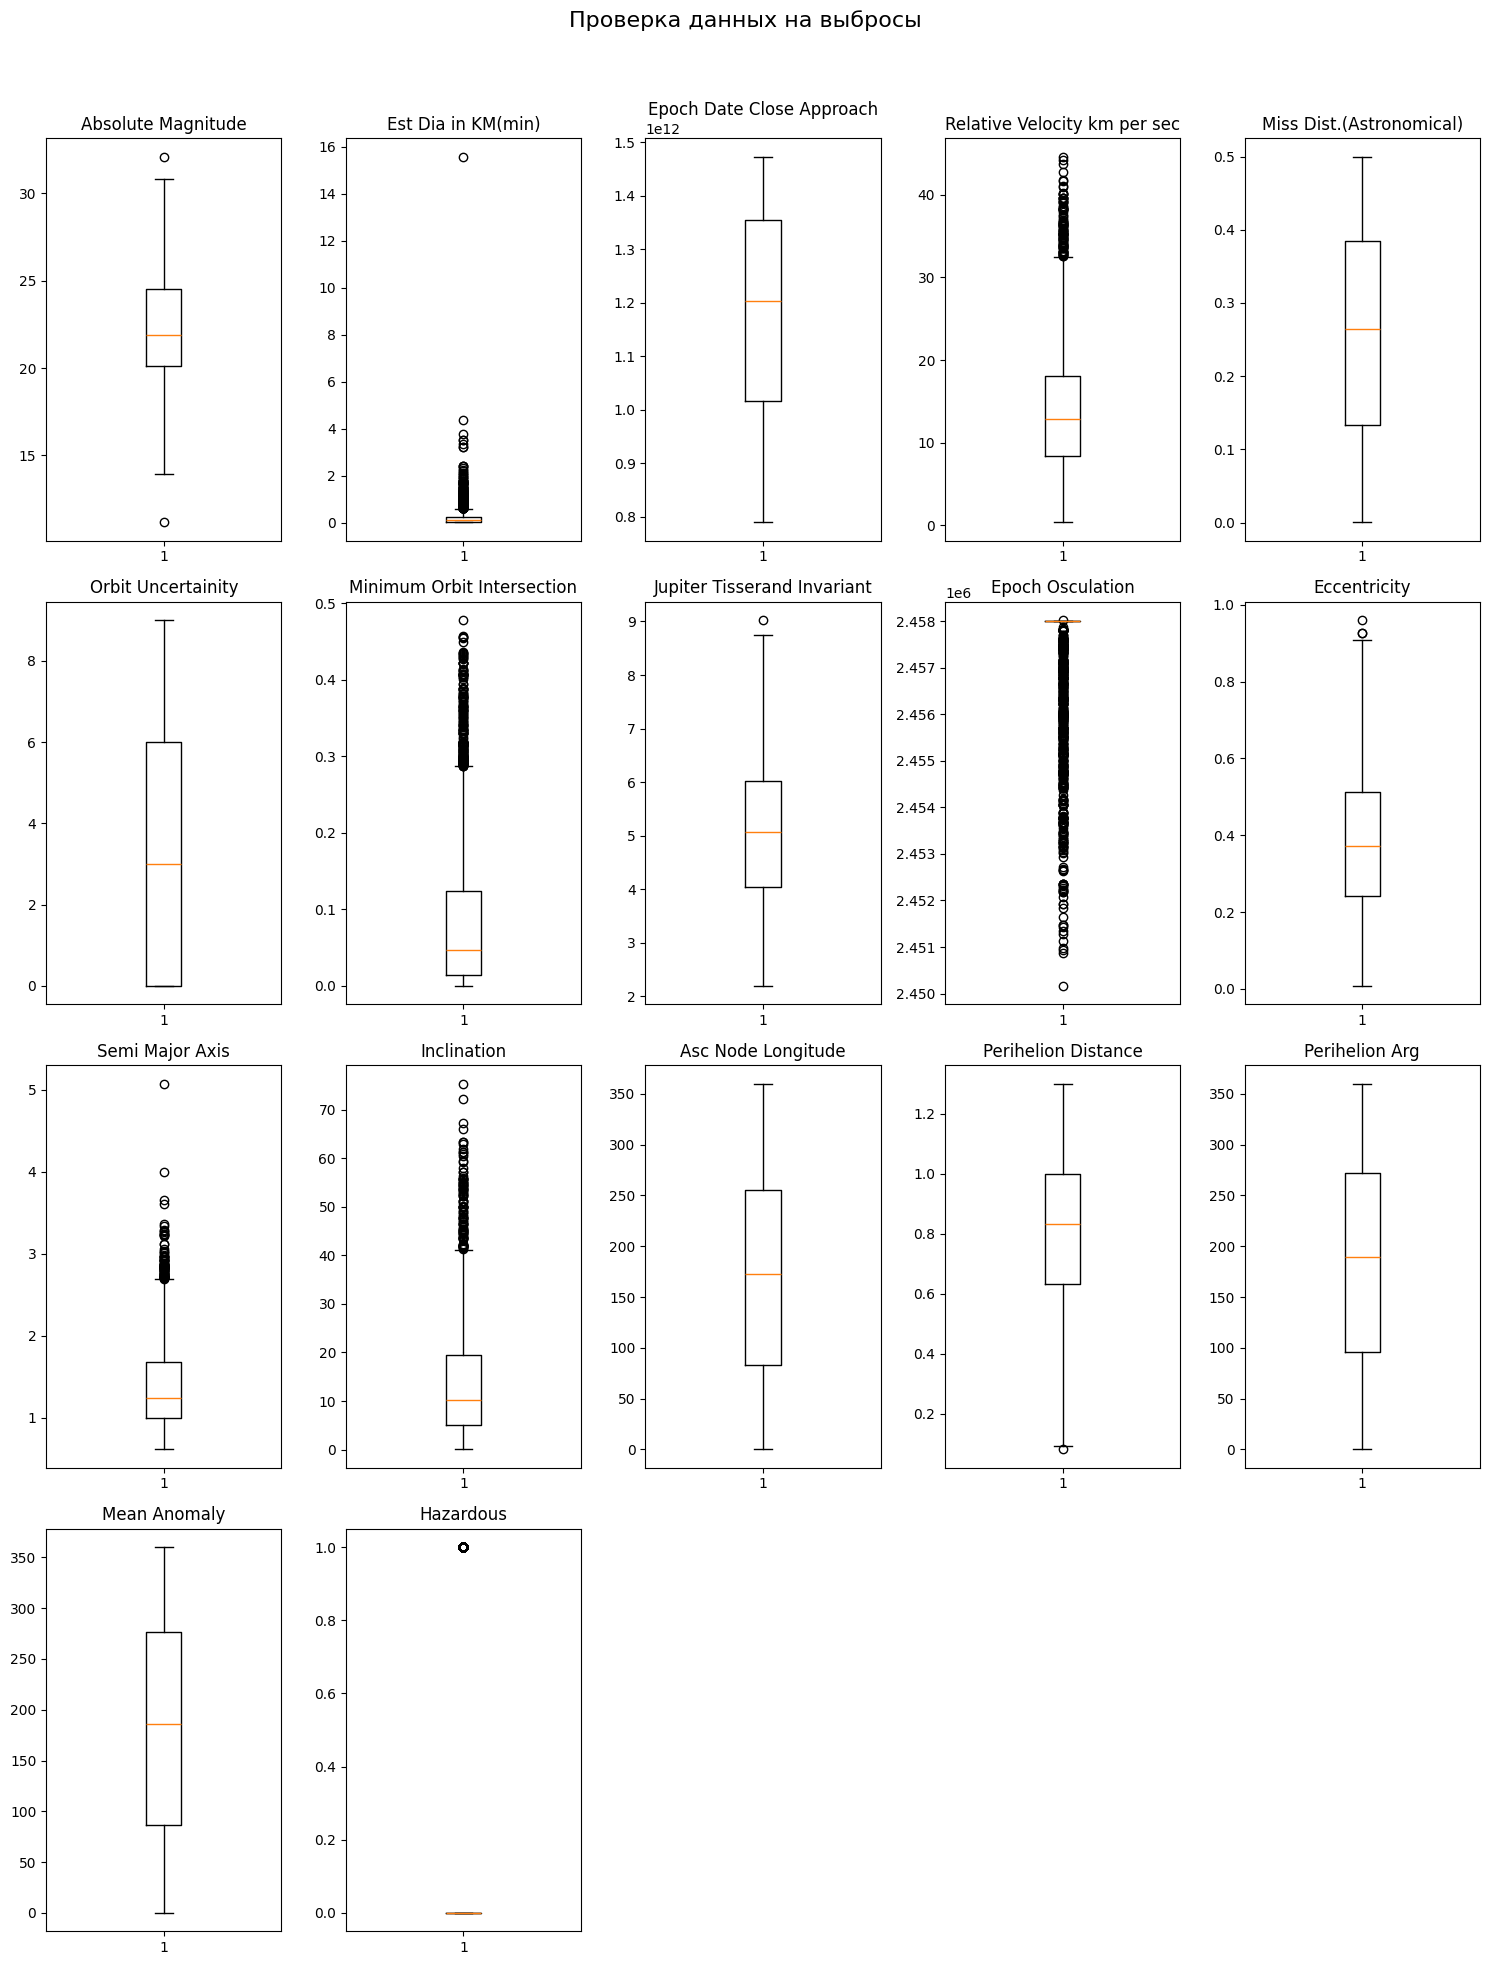

In [21]:
n = len(df.columns)
ncols = 5  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

# Создание boxplot для каждого числового столбца
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)  # Заголовок для каждого графика

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Проверка данных на выбросы", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Автоматическая настройка отступов
plt.show()  # Отображение графиков

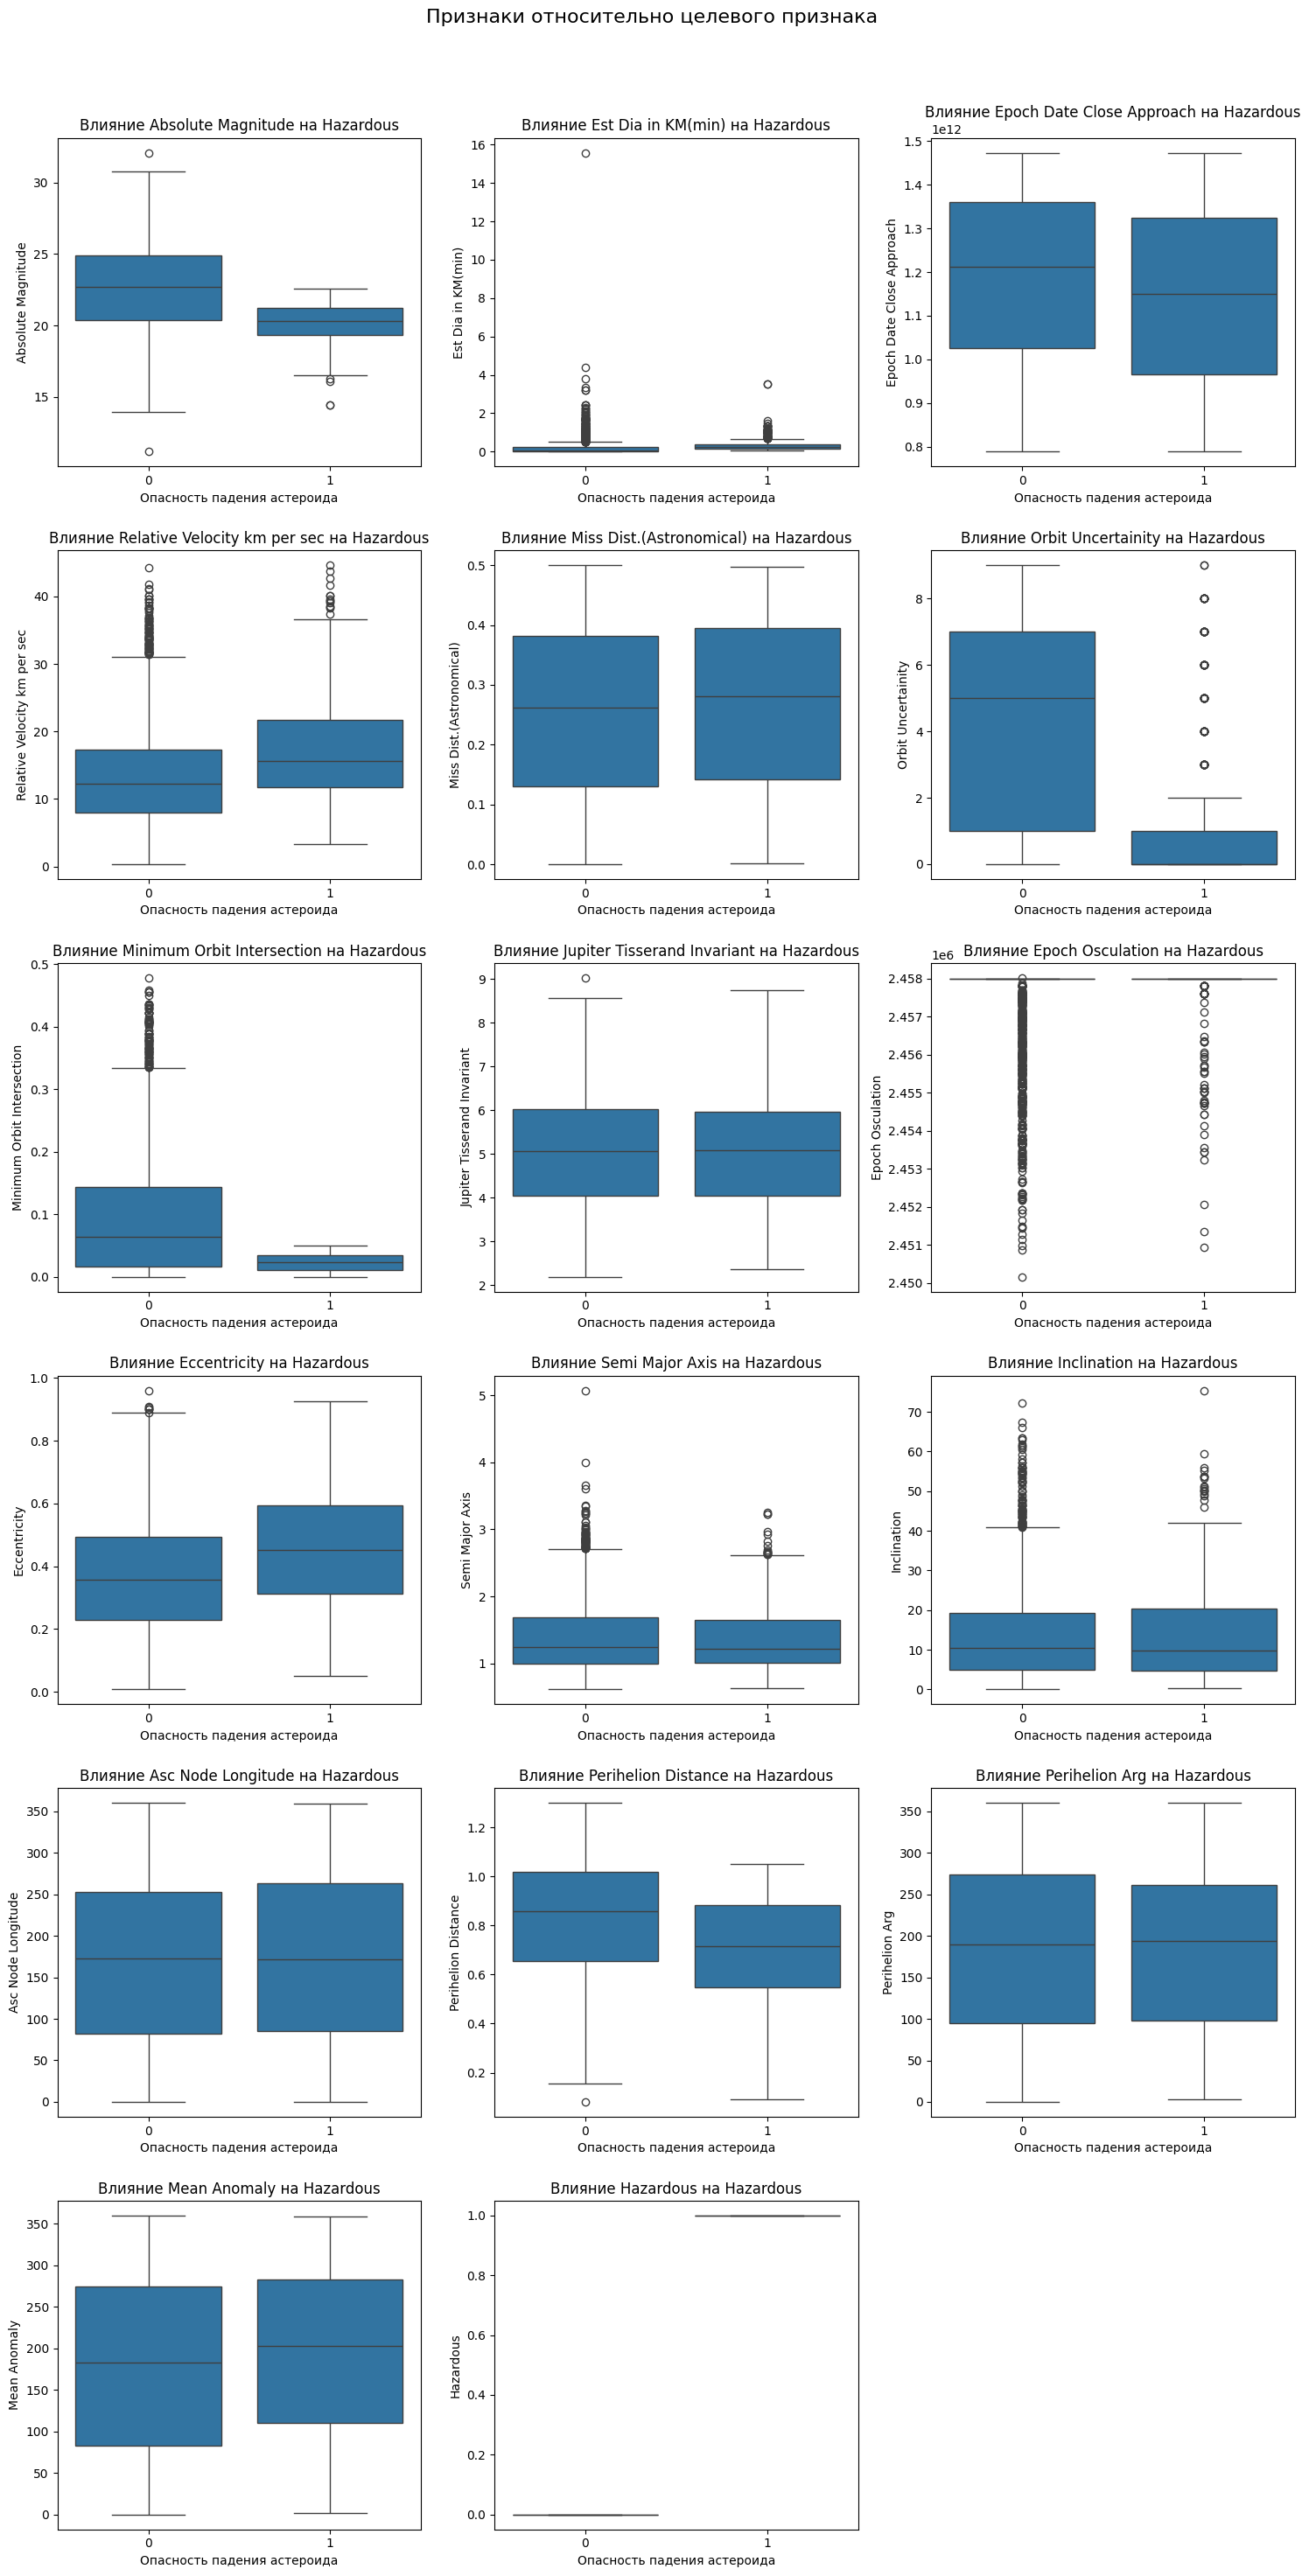

In [22]:
n = len(df.columns)
ncols = 3  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

for i, feature in enumerate(df.columns):
    sns.boxplot(x='Hazardous', y=feature, data=df, ax=axes[i])  # Указываем ось для каждого графика
    axes[i].set_title(f'Влияние {feature} на Hazardous')
    axes[i].set_xlabel('Опасность падения астероида')
    axes[i].set_ylabel(feature)

# Убираем пустые подграфики, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Признаки относительно целевого признака", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Выбросы в данных есть, но пока их обрабатывать не будем, посмотрим как будет обучаться модель с ними.

### Сохраним подготовленную выборку на диск

In [23]:
df.to_csv("./nasa_clean_dataset.csv", index=False)

## Подготовка данных к моделированию

### Поделим нашу таблицу на тренировочную и тестовую в соотношении 80/20

In [24]:
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Размер тренировочной выборки (признаки):', X_train.shape)
print('Размер тестовой выборки (признаки):', X_test.shape)
print('Размер тренировочной выборки (целевой признак):', y_train.shape)
print('Размер тестовой выборки (целевой признак):', y_test.shape)

Размер тренировочной выборки (признаки): (3749, 16)
Размер тестовой выборки (признаки): (938, 16)
Размер тренировочной выборки (целевой признак): (3749,)
Размер тестовой выборки (целевой признак): (938,)


### Отшкалируем данные

In [25]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
pd.DataFrame(X_train_scaler).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.667933,-0.434121,-0.592489,0.704970,0.609875,1.445541,-0.390785,0.952956,-4.668099,-1.085246,-0.849006,0.802001,1.797078,-0.153379,0.408607,-0.564880
1,0.110117,-0.322729,0.921550,1.476271,1.574719,-0.173427,-0.893442,-1.328563,0.307801,2.094698,1.127910,-1.073301,-1.407303,-1.386824,-0.778327,0.417068
2,1.574384,-0.505499,0.960691,-0.612627,-1.674930,1.445541,-0.838252,-0.466692,-1.343121,0.046887,0.169308,-1.059252,0.583064,0.390247,-1.178324,1.437467
3,0.354161,-0.381604,-0.652768,-0.627998,-0.035363,0.150367,-0.571492,1.280630,0.307801,0.293603,-0.986356,-0.827990,-0.352692,-1.310103,0.678060,1.202968
4,-0.447700,-0.089998,0.344699,-0.107535,0.072103,-0.173427,0.879890,1.316406,0.307801,0.884690,-1.021346,0.253535,-0.186958,-1.736608,1.625589,-0.221689


### Напишем функцию для подбора гиперпараметров и подсчета метрик

In [26]:
# Функция подбора гиперпараметров. Используем RandomizedSearchCV для скорости обучения
def tune_hyperparameters(model, param_grid, X_train, y_train, cv=5, scoring='accuracy', n_iter=30):

    rand_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=4, n_iter=n_iter, random_state=42)
    rand_search.fit(X_train, y_train)
    
    print(f"Лучшие гиперпараметры для {model}: {rand_search.best_params_}")
    
    return rand_search.best_estimator_

# Функция подсчета метрик
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred, average='weighted'), 3),
        "Recall": round(recall_score(y_test, y_pred, average='weighted'), 3),
        "F1 Score": round(f1_score(y_test, y_pred, average='weighted'), 3),
        "ROC AUC": round(roc_auc_score(y_test, y_prob, multi_class='ovr'), 3) if y_prob is not None else None
    }
    
    return metrics, y_pred, y_prob

# Функция визуализации ROC кривой
def plot_roc_curve(y_test, y_prob, model):
    if y_prob is None:
        print(f"ROC curve not available for {model} (no probability estimates).")
        return
    
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve ({model})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model}')
    plt.legend()
    plt.show()

# Функция визуализации матрицы ошибок с нормализацией    
def plot_confusion_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model}')
    plt.show()

# Функция визуализации важности признаков    
def plot_feature_importance(model, X, model_name):
    if hasattr(model, "feature_importances_"):
        feature_imp = pd.DataFrame(
            sorted(zip(model.feature_importances_, X.columns)),
            columns=['Важность признака', 'Признак']
        )
        plt.figure(figsize=(10, 10))
        sns.barplot(x="Важность признака", y="Признак", data=feature_imp.sort_values(by="Важность признака", ascending=False))
        plt.title(f'Важность признака для {model_name}')
        plt.tight_layout()
        plt.grid()
        plt.show()
    else:
        print("Модель не поддерживает feature_importances_")

## LogisticRegression

In [27]:
# Определяем сетку гиперпараметров
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced', None], 
    'C' : [1, 10, 100, 1000],
    'max_iter': [100, 300, 500, 1000]
}

In [28]:
%%time

model_lr = LogisticRegression(random_state=42)     
best_model_lr = tune_hyperparameters(model_lr, param_grid_lr, X_train_scaler, y_train)
metrics_lr, y_pred_lr, y_prob_lr = evaluate_model(best_model_lr, X_test_scaler, y_test)

Лучшие гиперпараметры для LogisticRegression(random_state=42): {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': None, 'C': 1000}
CPU times: total: 188 ms
Wall time: 1.62 s


In [29]:
# Подсчет метрик
df_metrics_lr = pd.DataFrame([metrics_lr])
df_metrics_lr

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.948,0.948,0.948,0.948,0.983


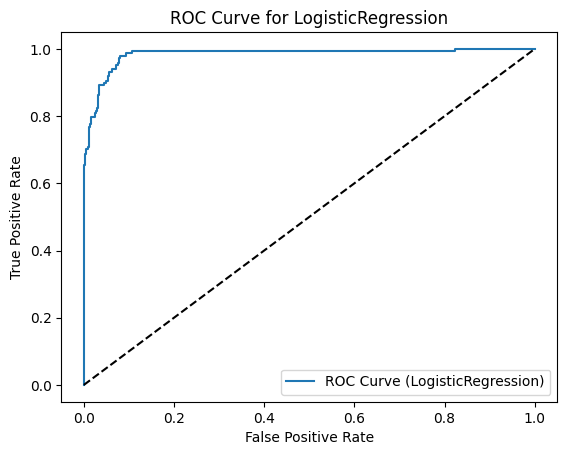

In [30]:
plot_roc_curve(y_test, y_prob_lr, 'LogisticRegression')

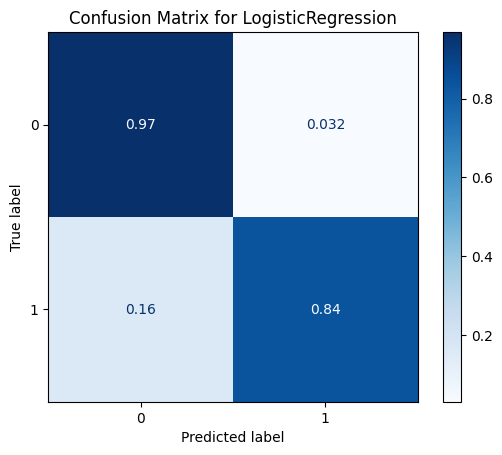

In [31]:
plot_confusion_matrix(y_test, y_pred_lr, 'LogisticRegression')

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): астероид не представляет опасность и модель это предсказала (Predicted label 0 : True label 0) - 97%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что астероид опасен, а на самом деле нет (Predicted label 1 : True label 0) - 3%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что астероид не опасен, но на самом деле опасен (Predicted label 0 : True label 1) - 16%
- True Negative (истинно-отрицательное решение): астероид опасен и прогноз модели это предсказал (Predicted label 1 : True label 1) - 84%

In [32]:
plot_feature_importance(best_model_lr, X_train, 'LogisticRegression')

Модель не поддерживает feature_importances_


## KNN

In [33]:
# Определяем сетку гиперпараметров
param_grid_knn = {
    'n_neighbors': list(range(1, 31, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'p': [1, 2, 3]
}

In [34]:
%%time

model_knn = KNeighborsClassifier()     
best_model_knn = tune_hyperparameters(model_knn, param_grid_knn, X_train_scaler, y_train)
metrics_knn, y_pred_knn, y_prob_knn = evaluate_model(best_model_knn, X_test_scaler, y_test)

Лучшие гиперпараметры для KNeighborsClassifier(): {'weights': 'distance', 'p': 1, 'n_neighbors': 17, 'metric': 'manhattan'}
CPU times: total: 422 ms
Wall time: 2.2 s


In [35]:
# Подсчет метрик
df_metrics_knn = pd.DataFrame([metrics_knn])
df_metrics_knn

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.925,0.924,0.925,0.919,0.971


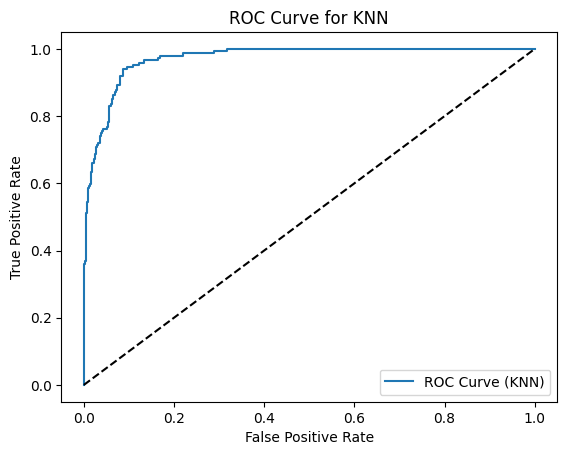

In [36]:
plot_roc_curve(y_test, y_prob_knn, 'KNN')

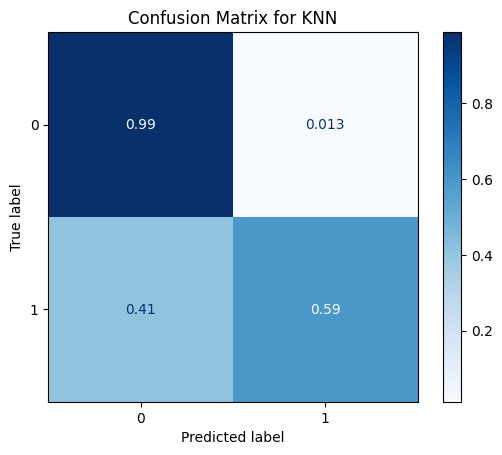

In [37]:
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): астероид не представляет опасность и модель это предсказала (Predicted label 0 : True label 0) - 99%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что астероид опасен, а на самом деле нет (Predicted label 1 : True label 0) - 1%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что астероид не опасен, но на самом деле опасен (Predicted label 0 : True label 1) - 41%
- True Negative (истинно-отрицательное решение): астероид опасен и прогноз модели это предсказал (Predicted label 1 : True label 1) - 59%

In [38]:
plot_feature_importance(best_model_knn, X_train, 'KNN')

Модель не поддерживает feature_importances_


## SVC

In [39]:
# Определяем сетку гиперпараметров
param_grid_svc = {'C': [0.01, 0.1, 1, 10],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']
            }

In [40]:
%%time

model_svc = SVC(probability=True)     
best_model_svc = tune_hyperparameters(model_svc, param_grid_svc, X_train_scaler, y_train)
metrics_svc, y_pred_svc, y_prob_svc = evaluate_model(best_model_svc, X_test_scaler, y_test)

Лучшие гиперпараметры для SVC(probability=True): {'kernel': 'rbf', 'C': 10}
CPU times: total: 594 ms
Wall time: 8.72 s


In [41]:
# Подсчет метрик
df_metrics_svc = pd.DataFrame([metrics_svc])
df_metrics_svc

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.961,0.96,0.961,0.96,0.991


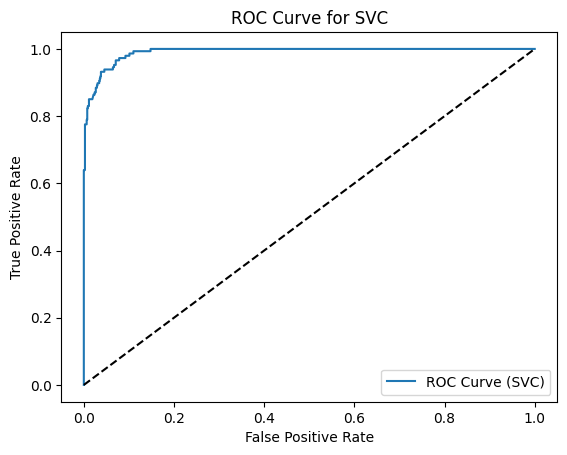

In [42]:
plot_roc_curve(y_test, y_prob_svc, 'SVC')

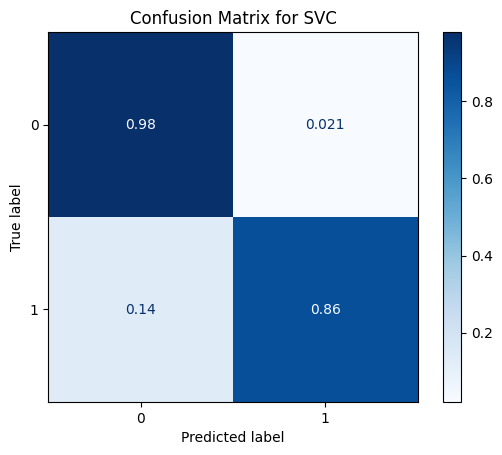

In [43]:
plot_confusion_matrix(y_test, y_pred_svc, 'SVC')

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): астероид не представляет опасность и модель это предсказала (Predicted label 0 : True label 0) - 98%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что астероид опасен, а на самом деле нет (Predicted label 1 : True label 0) - 2%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что астероид не опасен, но на самом деле опасен (Predicted label 0 : True label 1) - 14%
- True Negative (истинно-отрицательное решение): астероид опасен и прогноз модели это предсказал (Predicted label 1 : True label 1) - 86%

In [44]:
plot_feature_importance(best_model_svc, X_train, 'SVC')

Модель не поддерживает feature_importances_


## DecisionTreeClassifier

In [45]:
# Определяем сетку гиперпараметров
param_grid_dt = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None] + [i for i in range(1, 31, 5)],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [46]:
%%time

model_dt = DecisionTreeClassifier(random_state=42)     
best_model_dt = tune_hyperparameters(model_dt, param_grid_dt, X_train, y_train)
metrics_dt, y_pred_dt, y_prob_dt = evaluate_model(best_model_dt, X_test, y_test)

Лучшие гиперпараметры для DecisionTreeClassifier(random_state=42): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 16, 'criterion': 'gini'}
CPU times: total: 109 ms
Wall time: 539 ms


In [47]:
# Подсчет метрик
df_metrics_dt = pd.DataFrame([metrics_dt])
df_metrics_dt

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.996,0.996,0.996,0.996,0.995


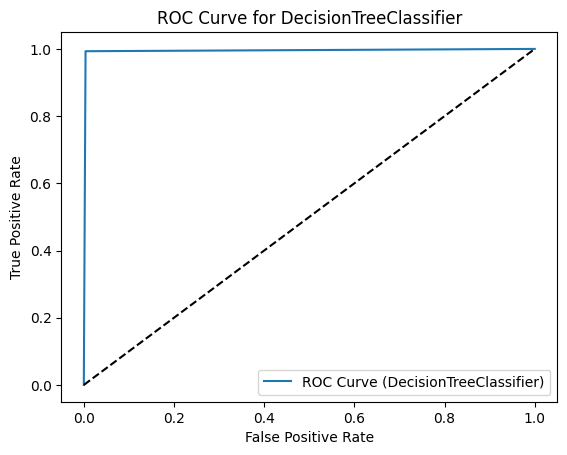

In [48]:
plot_roc_curve(y_test, y_prob_dt, 'DecisionTreeClassifier')

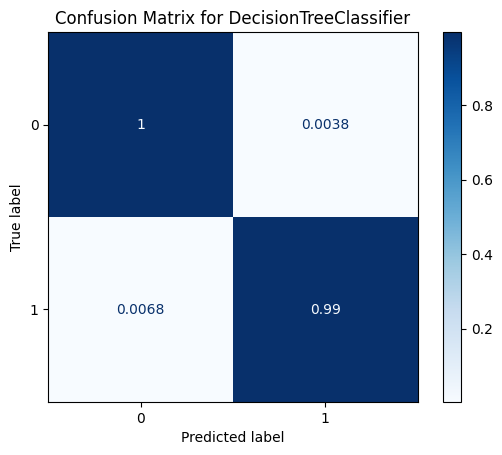

In [49]:
plot_confusion_matrix(y_test, y_pred_dt, 'DecisionTreeClassifier')

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): астероид не представляет опасность и модель это предсказала (Predicted label 0 : True label 0) - 100%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что астероид опасен, а на самом деле нет (Predicted label 1 : True label 0) - 0%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что астероид не опасен, но на самом деле опасен (Predicted label 0 : True label 1) - 1%
- True Negative (истинно-отрицательное решение): астероид опасен и прогноз модели это предсказал (Predicted label 1 : True label 1) - 99%

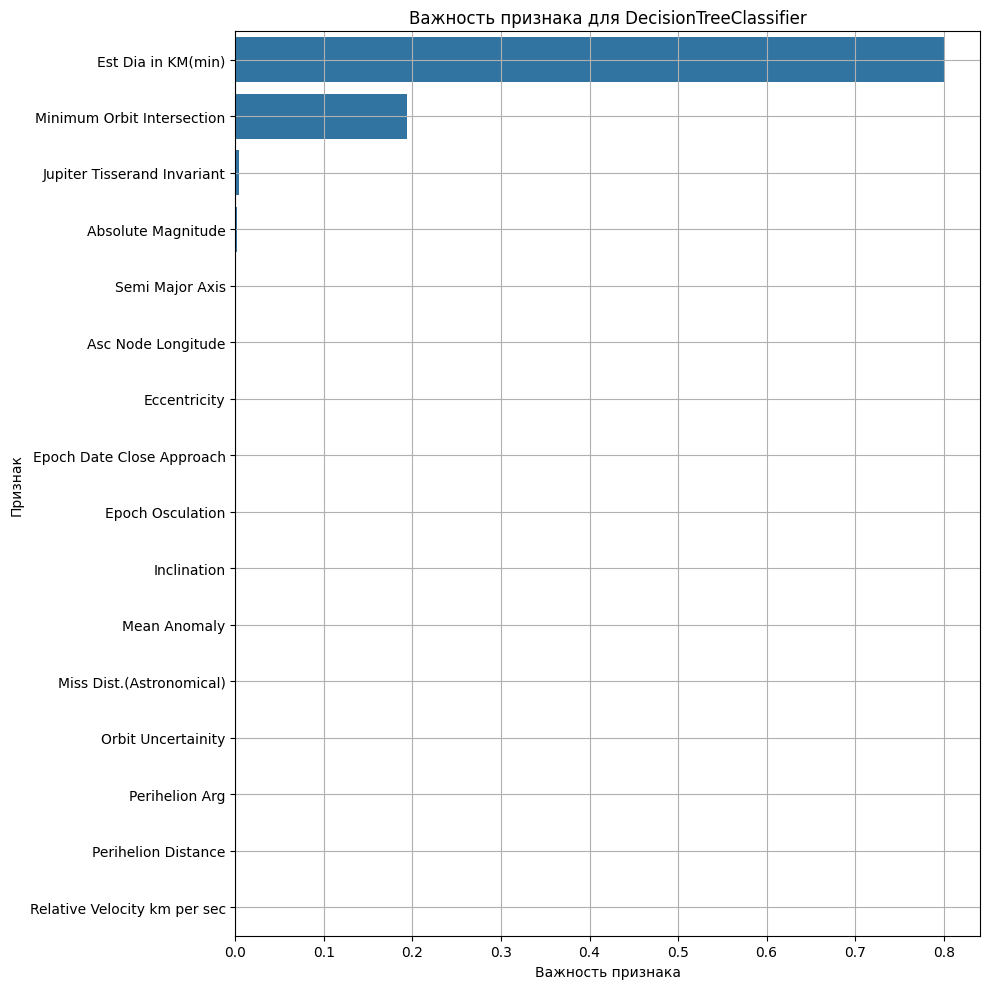

In [50]:
plot_feature_importance(best_model_dt, X_train, 'DecisionTreeClassifier')

## RandomForestClassifier

In [51]:
# Определяем сетку гиперпараметров
param_grid_rf = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None] + [i for i in range(1, 21, 5)],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'ccp_alpha': [0.01, 0.03, 0.05],
    'n_estimators': [i for i in range(50, 201, 50)]
}

In [52]:
%%time

model_rf = RandomForestClassifier(random_state=42)     
best_model_rf = tune_hyperparameters(model_rf, param_grid_rf, X_train, y_train)
metrics_rf, y_pred_rf, y_prob_rf = evaluate_model(best_model_rf, X_test, y_test)

Лучшие гиперпараметры для RandomForestClassifier(random_state=42): {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 6, 'criterion': 'entropy', 'ccp_alpha': 0.01}
CPU times: total: 656 ms
Wall time: 17.2 s


In [53]:
# Подсчет метрик
df_metrics_rf = pd.DataFrame([metrics_rf])
df_metrics_rf

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.995,0.995,0.995,0.995,0.998


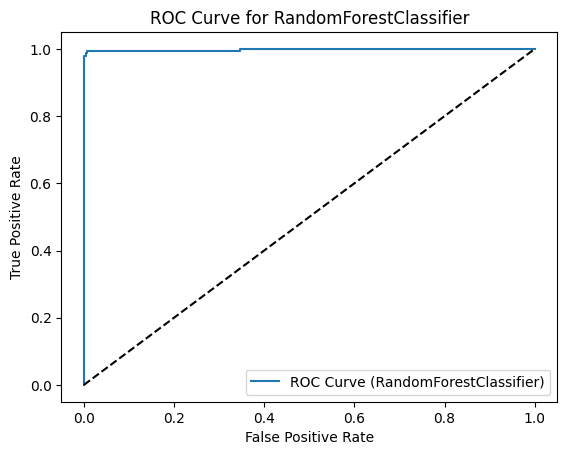

In [54]:
plot_roc_curve(y_test, y_prob_rf, 'RandomForestClassifier')

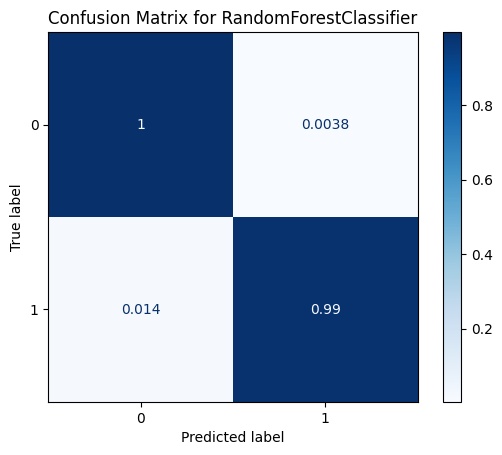

In [55]:
plot_confusion_matrix(y_test, y_pred_rf, 'RandomForestClassifier')

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): астероид не представляет опасность и модель это предсказала (Predicted label 0 : True label 0) - 100%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что астероид опасен, а на самом деле нет (Predicted label 1 : True label 0) - 0%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что астероид не опасен, но на самом деле опасен (Predicted label 0 : True label 1) - 1%
- True Negative (истинно-отрицательное решение): астероид опасен и прогноз модели это предсказал (Predicted label 1 : True label 1) - 99%

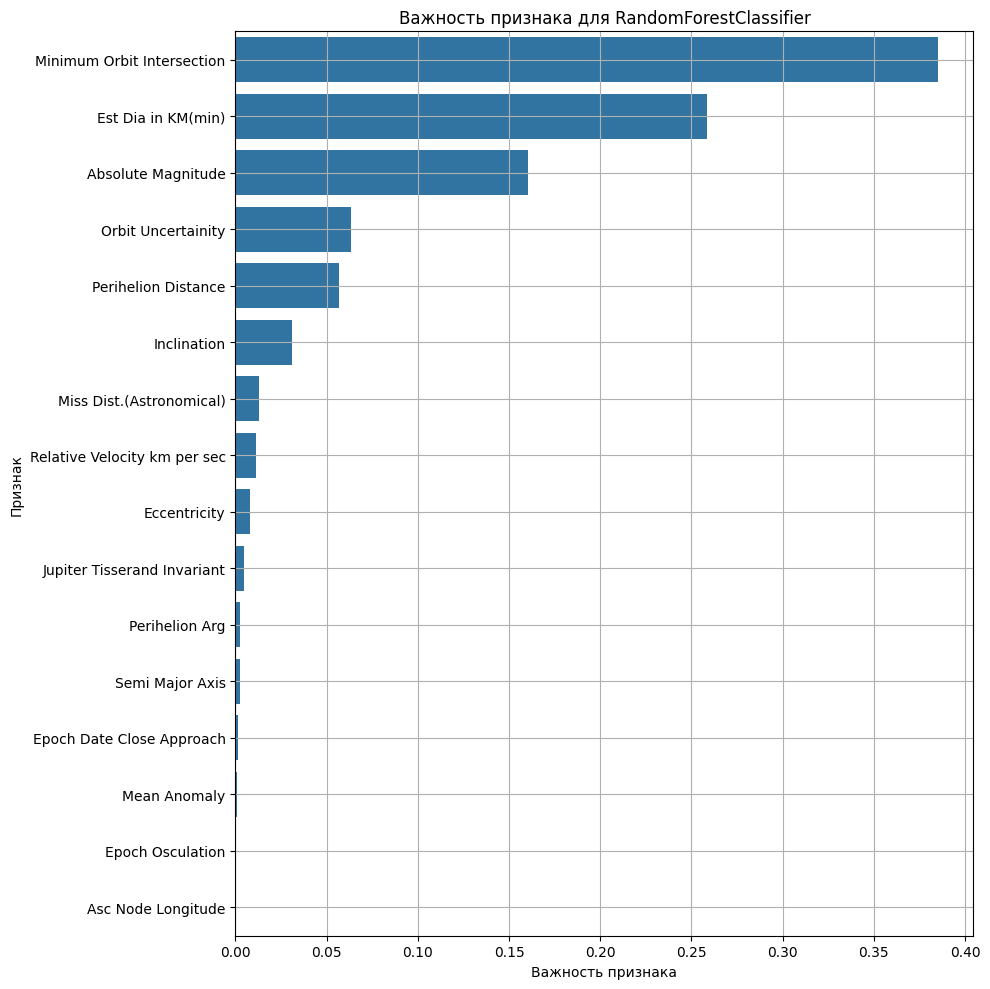

In [56]:
plot_feature_importance(best_model_rf, X_train, 'RandomForestClassifier')

## CatBoostClassifier

In [57]:
# Определяем сетку гиперпараметров
param_grid_cb = {
    'learning_rate': [None] + [0.1, 0.2],
    'l2_leaf_reg': [None] + [1, 5, 9],
    'auto_class_weights': ['Balanced', None]
}

In [58]:
%%time

model_cb = CatBoostClassifier(random_state=42, verbose=0)     
best_model_cb = tune_hyperparameters(model_cb, param_grid_cb, X_train, y_train)
metrics_cb, y_pred_cb, y_prob_cb = evaluate_model(best_model_cb, X_test, y_test)

Лучшие гиперпараметры для <catboost.core.CatBoostClassifier object at 0x000001F7AFE567E0>: {'learning_rate': None, 'l2_leaf_reg': 1, 'auto_class_weights': 'Balanced'}
CPU times: total: 26.3 s
Wall time: 1min 4s


In [59]:
# Подсчет метрик
df_metrics_cb = pd.DataFrame([metrics_cb])
df_metrics_cb

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.995,0.995,0.995,0.995,1.0


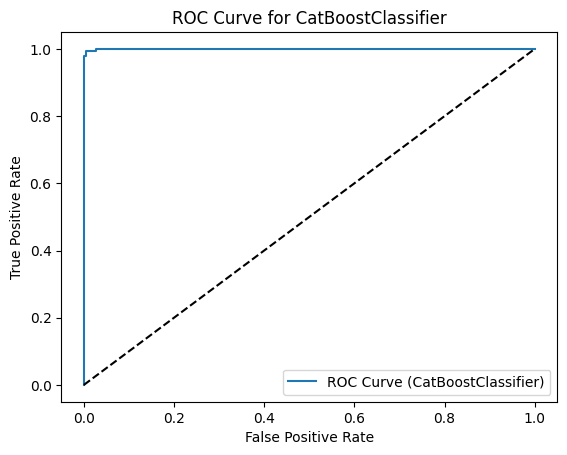

In [60]:
plot_roc_curve(y_test, y_prob_cb, model='CatBoostClassifier')

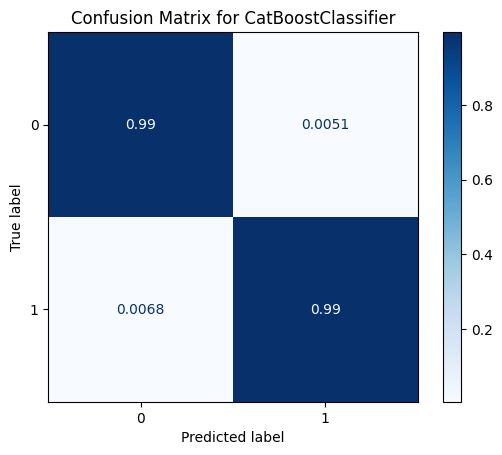

In [61]:
plot_confusion_matrix(y_test, y_pred_cb, model='CatBoostClassifier')

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): астероид не представляет опасность и модель это предсказала (Predicted label 0 : True label 0) - 100%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что астероид опасен, а на самом деле нет (Predicted label 1 : True label 0) - 0%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что астероид не опасен, но на самом деле опасен (Predicted label 0 : True label 1) - 1%
- True Negative (истинно-отрицательное решение): астероид опасен и прогноз модели это предсказал (Predicted label 1 : True label 1) - 99%

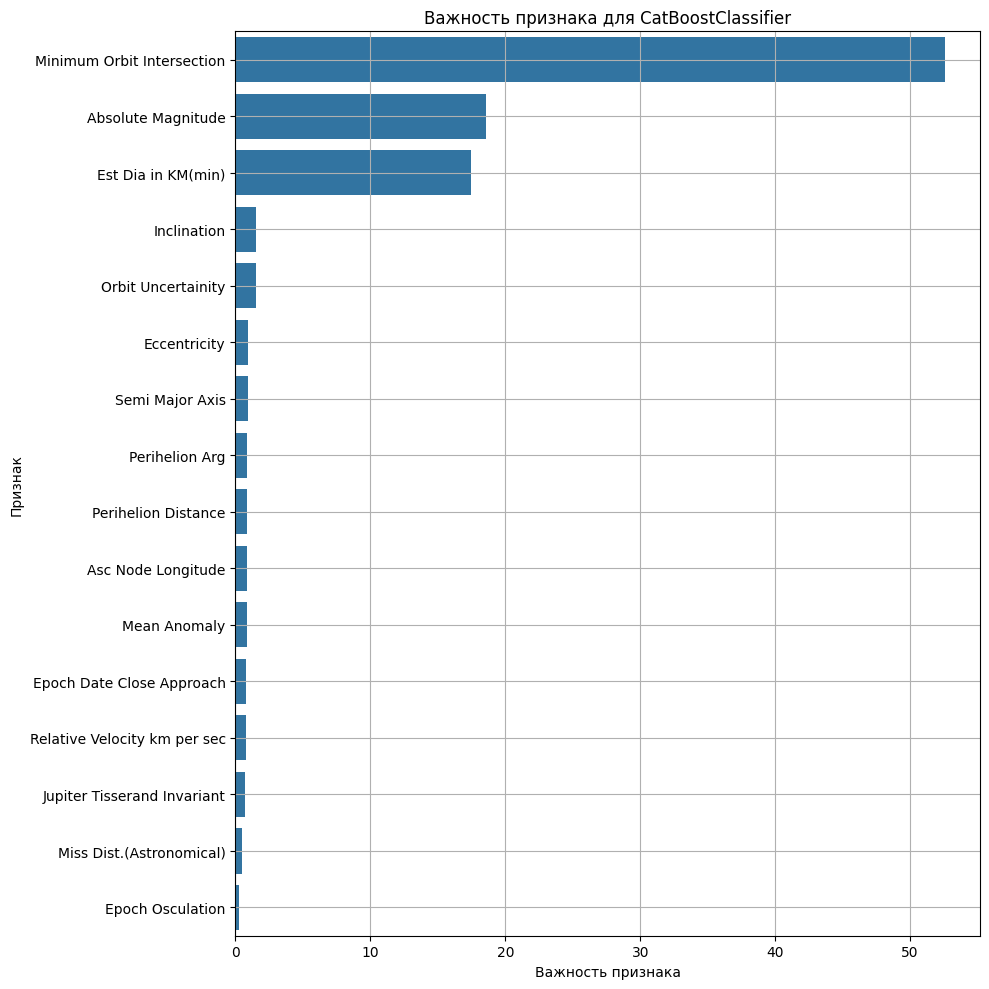

In [62]:
plot_feature_importance(best_model_cb, X_train, model_name='CatBoostClassifier')

## XGBClassifier

In [63]:
# Определяем сетку гиперпараметров
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None] + [i for i in range(1, 31, 5)],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.25, 1.0]
}

In [64]:
%%time

model_xgb = XGBClassifier(random_state=42, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          eval_metric='mlogloss'
                        )     
best_model_xgb = tune_hyperparameters(model_xgb, param_grid_xgb, X_train, y_train)
metrics_xgb, y_pred_xgb, y_prob_xgb = evaluate_model(best_model_xgb, X_test, y_test)

Лучшие гиперпараметры для XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): {'n_estimators': 100, 'max_depth': 21, 'learning_rate': 0.2, 'gamma': 1.0}
CPU times: total: 1.12 s
Wall time: 2.85 s


In [65]:
# Подсчет метрик
df_metrics_xgb = pd.DataFrame([metrics_xgb])
df_metrics_xgb

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.997,0.997,0.997,0.997,1.0


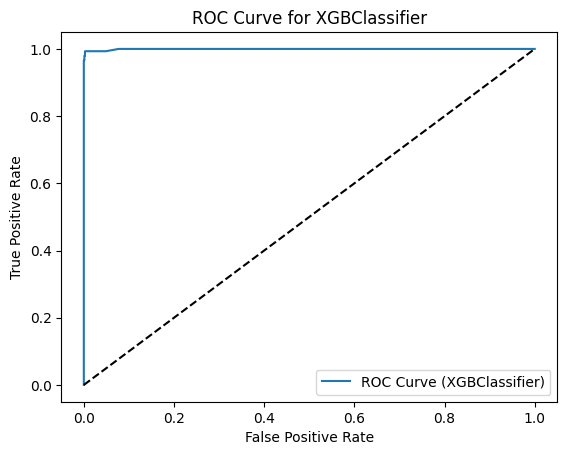

In [66]:
plot_roc_curve(y_test, y_prob_xgb, model='XGBClassifier')

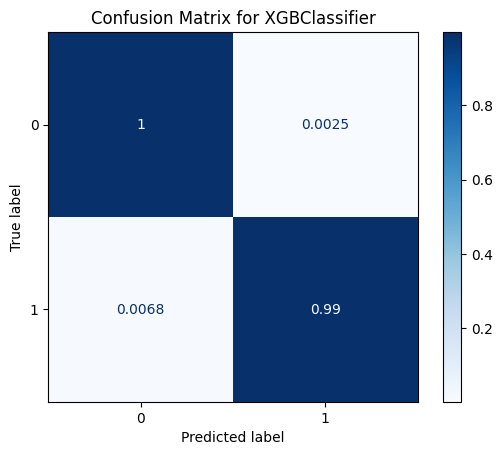

In [67]:
plot_confusion_matrix(y_test, y_pred_xgb, model='XGBClassifier')

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): астероид не представляет опасность и модель это предсказала (Predicted label 0 : True label 0) - 100%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что астероид опасен, а на самом деле нет (Predicted label 1 : True label 0) - 0%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что астероид не опасен, но на самом деле опасен (Predicted label 0 : True label 1) - 1%
- True Negative (истинно-отрицательное решение): астероид опасен и прогноз модели это предсказал (Predicted label 1 : True label 1) - 99%

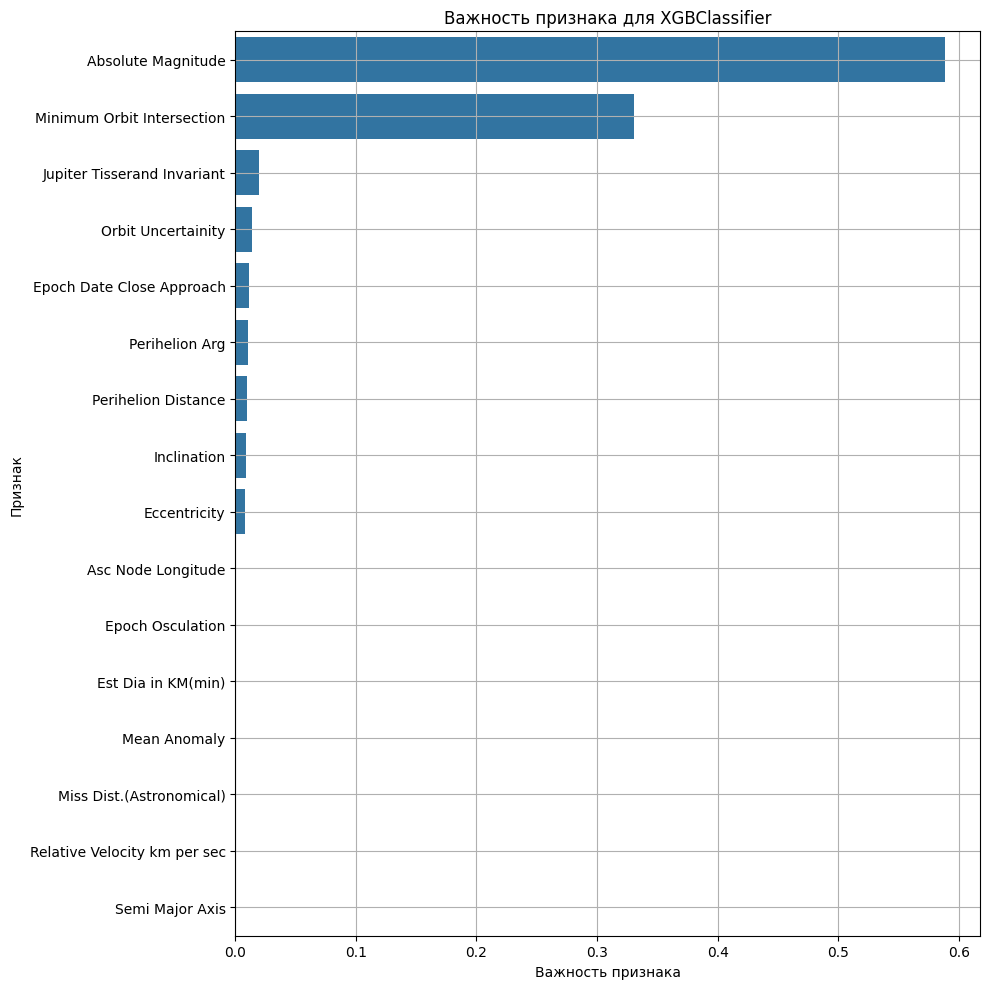

In [68]:
plot_feature_importance(best_model_xgb, X_train, model_name='XGBClassifier')

## Общая таблица полученных метрик качества

In [69]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(
    {'Метрики': [
        metrics_lr,
        metrics_knn,
        metrics_svc,
        metrics_dt, 
        metrics_rf,
        metrics_cb,
        metrics_xgb
    ]
    },
    index=[
        'LogisticRegression',
        'KNN',
        'SVC',
        'DecisionTreeClassifier', 
        'RandomForestClassifier',
        'CatBoostClassifier', 
        'XGBClassifier'
    ]
)

,Метрики
LogisticRegression,"{'Accuracy': 0.948, 'Precision': 0.948, 'Recall': 0.948, 'F1 Score': 0.948, 'ROC AUC': 0.983}"
KNN,"{'Accuracy': 0.925, 'Precision': 0.924, 'Recall': 0.925, 'F1 Score': 0.919, 'ROC AUC': 0.971}"
SVC,"{'Accuracy': 0.961, 'Precision': 0.96, 'Recall': 0.961, 'F1 Score': 0.96, 'ROC AUC': 0.991}"
DecisionTreeClassifier,"{'Accuracy': 0.996, 'Precision': 0.996, 'Recall': 0.996, 'F1 Score': 0.996, 'ROC AUC': 0.995}"
RandomForestClassifier,"{'Accuracy': 0.995, 'Precision': 0.995, 'Recall': 0.995, 'F1 Score': 0.995, 'ROC AUC': 0.998}"
CatBoostClassifier,"{'Accuracy': 0.995, 'Precision': 0.995, 'Recall': 0.995, 'F1 Score': 0.995, 'ROC AUC': 1.0}"
XGBClassifier,"{'Accuracy': 0.997, 'Precision': 0.997, 'Recall': 0.997, 'F1 Score': 0.997, 'ROC AUC': 1.0}"


**Вывод:**
1. Наилучшие результаты показали модели `DecisionTreeClassifier, RandomForestClassifier, CatBoostClassifier, XGBClassifier`
2. Хуже всех показала себя модель `KNN`
3. Важные признаки: `Minimum Orbit Intersection` - Минимальное пересечение орбиты, `Absolute Magnitude` - Абсолютная звездная величина, `Est Dia in KM(min)` - Расчетный диаметр в километрах (минимум).

## Сохранение лучшей модели и прогноза на диск

Примем лучшей модель `XGBClassifier`. 

In [70]:
# Сохранение модели
joblib.dump(best_model_xgb, 'xgb_nasa.joblib')

['xgb_nasa.joblib']

In [71]:
# Сохранение результатов модели на тестовых данных
xgb_test = best_model_xgb.predict(X_test)
pd.DataFrame(xgb_test).to_csv("./xgb_nasa_test_result.csv", index=False)
pd.DataFrame(xgb_test).head(10)

,0
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Использование AutoML

Используем следующие модели:
- H2O AutoML,
- AutoGluon, 
- FLAML

In [72]:
# Функция для оценки моделей
def evaluate_model_auto(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Словарь для хранения результатов
results = {}
probs = {}

### H2O AutoML

In [73]:
h2o.init(log_level="WARN")
h2o_train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
h2o_test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))
aml = H2OAutoML(max_models=10, seed=42, include_algos=["GBM", "DRF", "DeepLearning", "XGBoost"])
aml.train(x=X_train.columns.tolist(), y="Hazardous", training_frame=h2o_train)
pred_h2o = aml.leader.predict(h2o_test).as_data_frame()
results["H2O AutoML"] = evaluate_model_auto(y_test, (pred_h2o["predict"] > 0.5).astype(int), pred_h2o["predict"])
probs["H2O AutoML"] = pred_h2o["predict"]

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 23.0.1+11-39, mixed mode, sharing)
  Starting server from C:\Program Files\Python312\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\nizae\AppData\Local\Temp\tmpee9j78zx
  JVM stdout: C:\Users\nizae\AppData\Local\Temp\tmpee9j78zx\h2o_nizae_started_from_python.out
  JVM stderr: C:\Users\nizae\AppData\Local\Temp\tmpee9j78zx\h2o_nizae_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Samara
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_nizae_83cyjg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.949 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
01:04:09.596: AutoML: XGBoost is not available; skipping it.
01:04:09.635: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
01:04:12.520: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
01:04:13.750: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


01:04:14.959: _response pa

### AutoGluon

In [74]:
gluon_predictor = TabularPredictor(label="Hazardous").fit(pd.concat([X_train, y_train], axis=1), 
                                                          presets="medium_quality_faster_train", 
                                                          time_limit=600, 
                                                          verbosity=0)
pred_gluon = gluon_predictor.predict(X_test)
pred_proba_gluon = gluon_predictor.predict_proba(X_test)[1]
results["AutoGluon"] = evaluate_model_auto(y_test, pred_gluon, pred_proba_gluon)
probs["AutoGluon"] = pred_proba_gluon

No path specified. Models will be saved in: "AutogluonModels\ag-20250401_210535"
Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.


### FLAML

In [75]:
auto_ml_flaml = AutoML()
auto_ml_flaml.fit(X_train, 
                  y_train, 
                  task="classification", 
                  estimator_list=["lgbm", "rf", "xgboost", "catboost"], 
                  time_budget=300)
pred_flaml = auto_ml_flaml.predict(X_test)
pred_proba_flaml = auto_ml_flaml.predict_proba(X_test)[:, 1]
results["FLAML"] = evaluate_model_auto(y_test, pred_flaml, pred_proba_flaml)
probs["FLAML"] = pred_proba_flaml


[flaml.automl.logger: 04-02 01:05:50] {1728} INFO - task = classification
[flaml.automl.logger: 04-02 01:05:50] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 04-02 01:05:50] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-02 01:05:50] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'catboost']
[flaml.automl.logger: 04-02 01:05:50] {2258} INFO - iteration 0, current learner lgbm


[flaml.automl.logger: 04-02 01:05:50] {2393} INFO - Estimated sufficient time budget=1490s. Estimated necessary time budget=3s.
[flaml.automl.logger: 04-02 01:05:50] {2442} INFO -  at 0.2s,	estimator lgbm's best error=0.0016,	best estimator lgbm's best error=0.0016
[flaml.automl.logger: 04-02 01:05:50] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-02 01:05:50] {2442} INFO -  at 0.3s,	estimator lgbm's best error=0.0015,	best estimator lgbm's best error=0.0015
[flaml.automl.logger: 04-02 01:05:50] {2258} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-02 01:05:50] {2442} INFO -  at 0.5s,	estimator lgbm's best error=0.0015,	best estimator lgbm's best error=0.0015
[flaml.automl.logger: 04-02 01:05:50] {2258} INFO - iteration 3, current learner lgbm
[flaml.automl.logger: 04-02 01:05:51] {2442} INFO -  at 0.7s,	estimator lgbm's best error=0.0007,	best estimator lgbm's best error=0.0007
[flaml.automl.logger: 04-02 01:05:51] {2258} INFO - iteration 

### Общая таблица полученных метрик

In [76]:
# Вывод результатов
results_df = pd.DataFrame(results).T
results_df

,Accuracy,ROC AUC,Precision,Recall,F1-score
H2O AutoML,0.996802,0.994625,0.986486,0.993197,0.989831
AutoGluon,0.993603,0.999630,0.973154,0.986395,0.979730
FLAML,0.995736,0.999656,0.986395,0.986395,0.986395


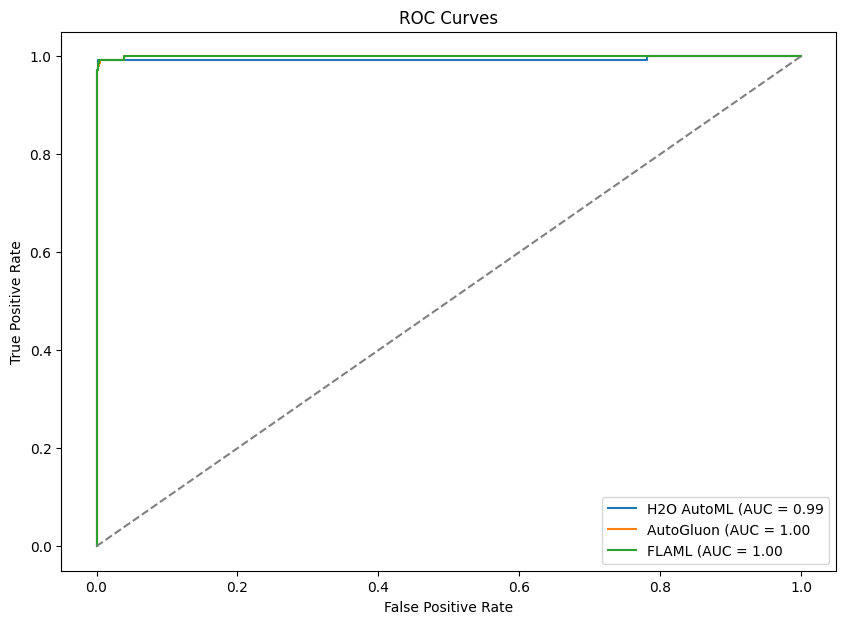

In [77]:
# Визуализация ROC-кривых
plt.figure(figsize=(10, 7))
for model, y_proba in probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


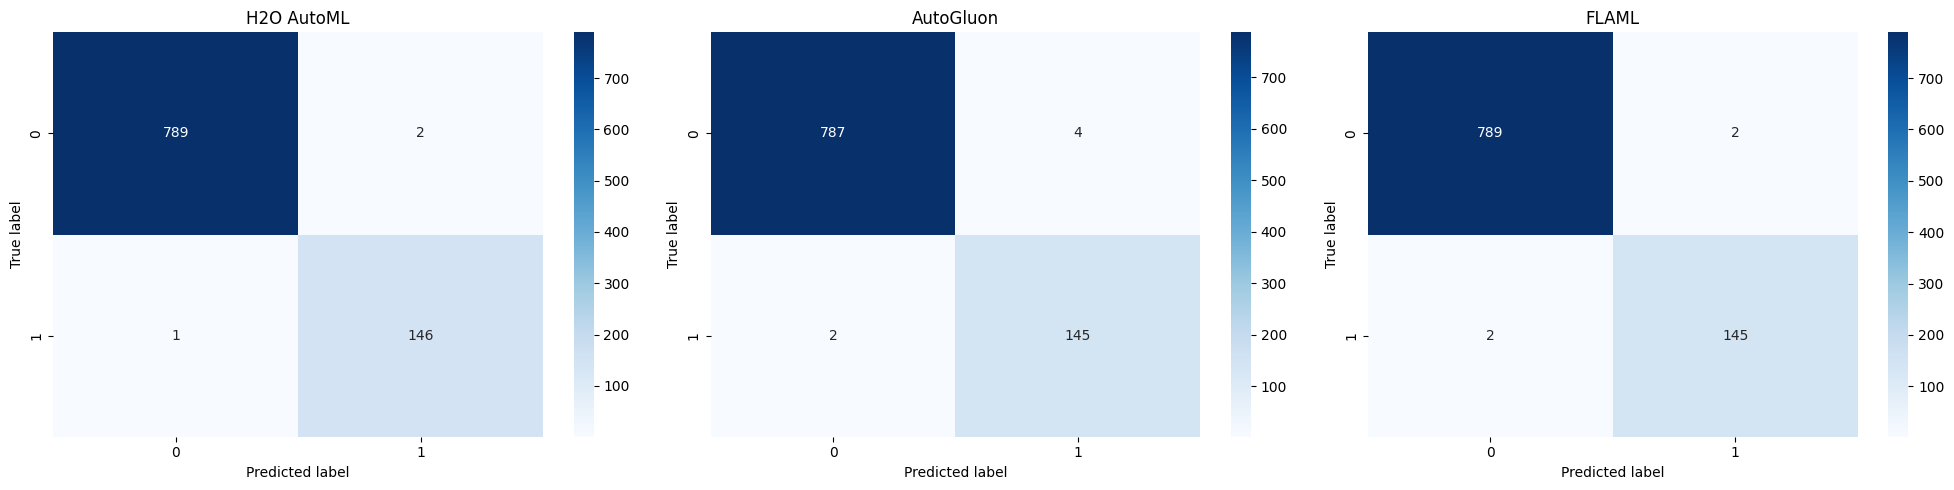

In [78]:
# Вывод матрицы ошибок
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()
for i, (model, y_proba) in enumerate(probs.items()):
    y_pred = (y_proba > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(model)
    axes[i].set_xlabel("Predicted label")
    axes[i].set_ylabel("True label")
plt.tight_layout()
plt.show()

### Сохранение лучшей модели на диск

In [79]:
# Определяем лучшую модель по Accuracy
best_model_name = results_df["Accuracy"].idxmax()
print(f"Лучшая модель: {best_model_name}")

Лучшая модель: H2O AutoML


In [80]:
# Сохраняем лучшую модель
if best_model_name == "H2O AutoML":
    model_path = "best_model_h2o"
    aml.leader.save_mojo(model_path)  # Сохранение модели H2O в формате MOJO
    print(f"Модель H2O сохранена в {model_path}")

elif best_model_name == "AutoGluon":
    model_path = "best_model_gluon"
    gluon_predictor.save(model_path)  # AutoGluon автоматически сохраняет все файлы модели
    print(f"Модель AutoGluon сохранена в {model_path}")

elif best_model_name == "FLAML":
    model_path = "best_model_flaml.pkl"
    with open(model_path, "wb") as f:
        pickle.dump(auto_ml_flaml, f)  # FLAML также можно сохранить с помощью pickle
    print(f"Модель FLAML сохранена в {model_path}")

Модель H2O сохранена в best_model_h2o


## Общий вывод

Был рассмотрен датасет `nasa.csv`. Изначально в нем было 40 столбцов и 4687 строк. 

Целевой столбец `Hazardous` - опасность столкновения астероида с Землей, данные столбца не сбалансированы.

Был выполнен первичный анализ данных и подготовка данных к обучению моделей. Были удалены лишние столбцы: с датой, с идентификаторами, с единственным уникальным значением и столбцы, способные вызвать мультиколлинеарность.

Были обучены и подобраны гиперпараметры для следующих моделей:

- LogisticRegression
- KNN
- SVC
- DecisionTreeClassifier
- RandomForestClassifier
- CatBoostClassifier
- XGBClassifier

Лучшей моделью была выбрана модель **XGBClassifier** со следующими гиперпараметрами: *{'n_estimators': 100, 'max_depth': 21, 'learning_rate': 0.2, 'gamma': 1.0}*.
Метрики на тестовой выборке получились: *{'Accuracy': 0.997, 'Precision': 0.997, 'Recall': 0.997, 'F1 Score': 0.997, 'ROC AUC': 1.0}*.

Важные признаки: `Minimum Orbit Intersection` - Минимальное пересечение орбиты, `Absolute Magnitude` - Абсолютная звездная величина, `Est Dia in KM(min)` - Расчетный диаметр в километрах (минимум).

Также были использованы AutoML модели:

- H2O AutoML
- AutoGluon
- Flaml

Лучшая модель: **H2O AutoML**. Ее метрики получились следующие: *{'Accuracy': 0.996802, 'ROC AUC': 0.994625, 'Precision': 0.986486, 'Recall': 0.993197, 'F1 Score': 0.989831}*

В целом все модели показали очень хороший результат.